In [2]:
%connect_info

{"key":"cab78829-de76-4dca-92ae-c22427802814","signature_scheme":"hmac-sha256","transport":"tcp","ip":"127.0.0.1","hb_port":9000,"control_port":9001,"shell_port":9002,"stdin_port":9003,"iopub_port":9004,"kernel_name":"python3112jvsc74a57bd04149aa2f31a7f8b5ff184e82bf464dce73529b69401cc2940ad6232b832b4da8"}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-v32413d8ac6f89b64cd40f46f1af5b068f7b681425.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import fft
from copy import deepcopy


In [4]:
%load_ext IPython.extensions.autoreload
%autoreload 2

import pywt
import pycwt

from hypyp.fnirs_tools import (
    xwt_coherence_morl,
    get_frequencies,
    smoothing
)
import hypyp.plots

ninja: error: '/tmp/pip-build-env-tiw5qk87/overlay/bin/cython', needed by 'pywt/_extensions/_cwt.cpython-311-x86_64-linux-gnu.so.p/_cwt.c', missing and no known rule to make it


Loading pywt from /home/patrice/work/ppsp/pywt/pywt
Loading pycwt from /home/patrice/work/ppsp/pycwt/pycwt


## Sine waves

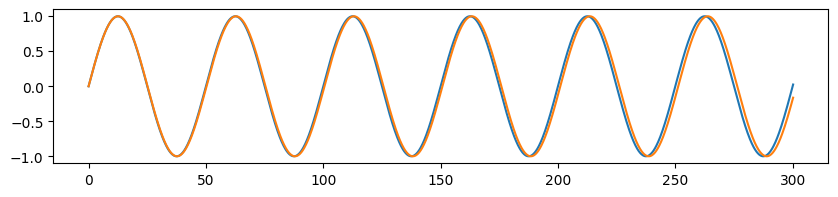

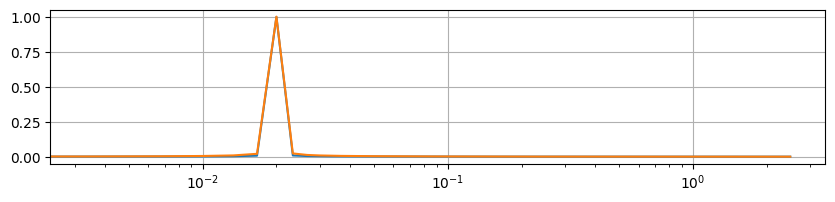

In [5]:
plt.figure(figsize=(10,2))

fs = 5
N = 1501
T = 1.0 / fs
x = np.linspace(0, N/fs, N)

freq1 = 0.02
freq2 = freq1 - 0.0001

y1 = np.sin(x * 2 * np.pi * freq1)
y2 = np.sin(x * 2 * np.pi * freq2)

# fft
y1_fft = fft.fft(y1)
x_fft = fft.fftfreq(N, T)[:N//2]
y2_fft = fft.fft(y2)

plt.plot(x, y1)
plt.plot(x, y2)
plt.show()

plt.figure(figsize=(10,2))

plt.plot(x_fft, 2.0/N * np.abs(y1_fft[0:N//2]))
plt.plot(x_fft, 2.0/N * np.abs(y2_fft[0:N//2]))
plt.xscale('log')
plt.grid()
plt.show()

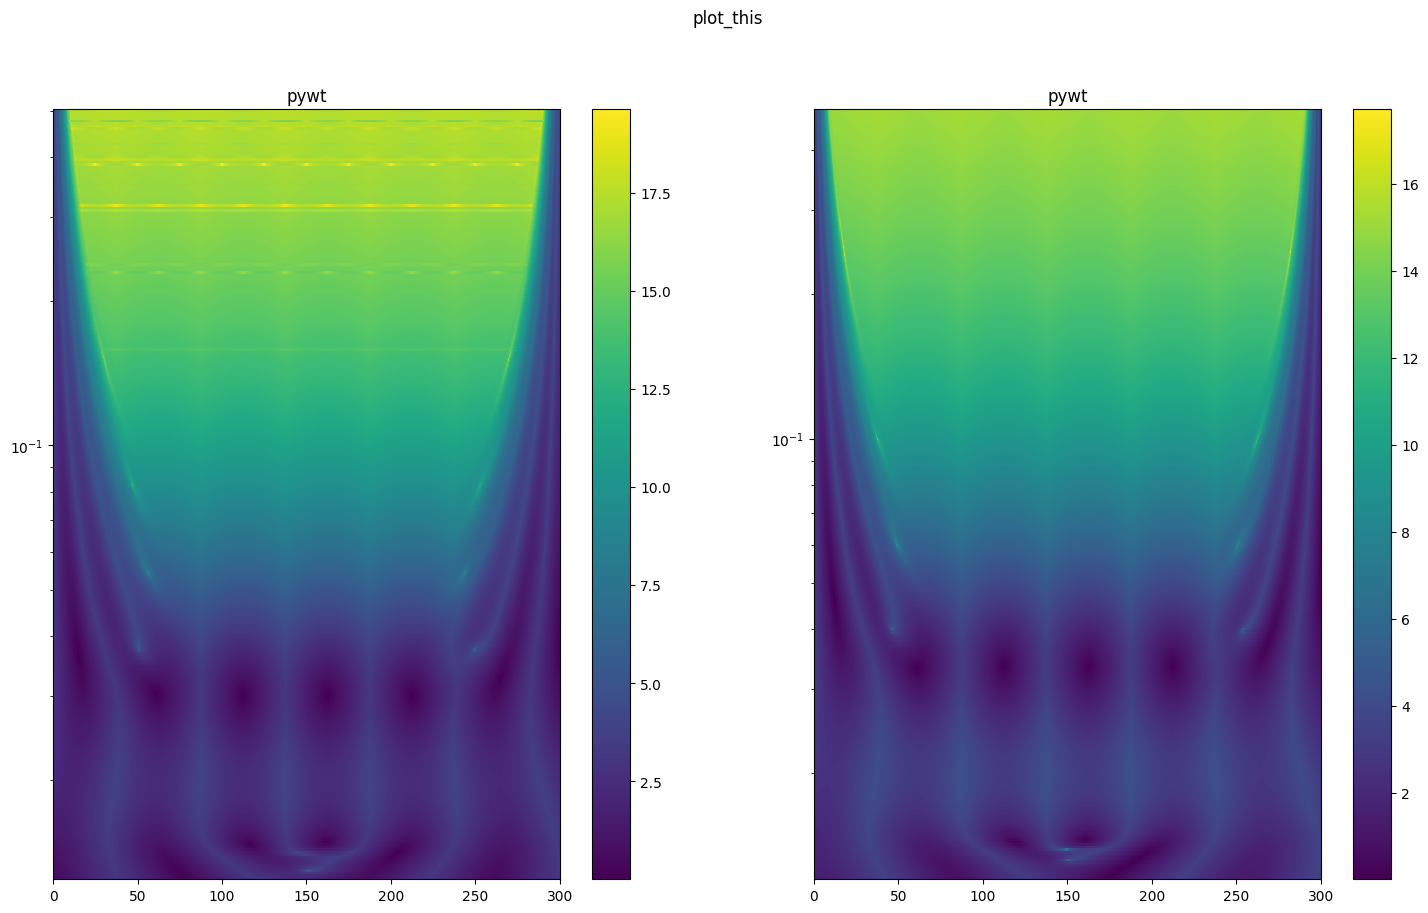

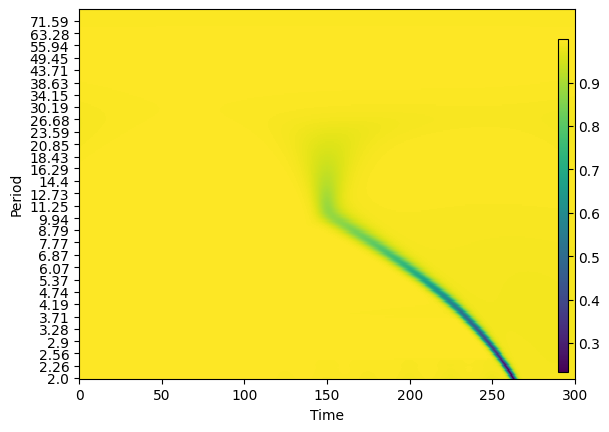

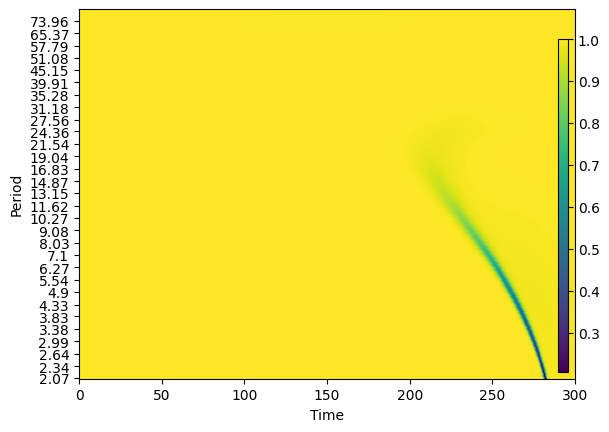

In [43]:
# full example

wavelet_name = 'cmor2-1'
tracer_pywt = dict(name='pywt')

wct_pywt, times, freqs_pywt, coif_pywt = xwt_coherence_morl(
    y1,
    y2,
    T,
    1/12,
    wavelet_name=wavelet_name,
    normalize=True,
    smoothing_params=dict(smooth_factor=-0.1, boxcar_size=1),
    tracer=tracer_pywt
)

tracer_pycwt = dict(name='pycwt')
wct_pycwt, aWCT_pycwt, coi_pycwt, freqs_pycwt, significance_pycwt = pycwt.wct(y1, y2, dt=1/fs, sig=False, tracer=tracer_pycwt)

tracers = [tracer_pywt, tracer_pycwt]

for tracer in tracers:
    #tracer['plot_this'] = np.abs(tracer['S12']) ** 2
    #tracer['plot_this'] = np.log(tracer['S1'] * tracer['S2']) # this shows a grid artifact, very interesting
    #tracer['plot_this'] = np.log(tracer['S1']) # this shows a grid artifact, very interesting
    tracer['plot_this'] = np.log(tracer['W1']) # this shows lines artifacts


plt.show()

hypyp.plots.plot_coefs(tracers, 'plot_this', 'plot_this')
#hypyp.plots.plot_coefs(tracers, 'S12', 'S12')
#hypyp.plots.plot_coefs(tracers, 'W1', 'W1')
#hypyp.plots.plot_coefs(tracers, 'W2', 'W2')
#hypyp.plots.plot_coefs(tracers, 'W12', 'W12')
#hypyp.plots.plot_coefs(tracers, 'S1', 'S1')
#hypyp.plots.plot_coefs(tracers, 'S2', 'S2')
#hypyp.plots.plot_coefs(tracers, 'S12', 'S12')
#
hypyp.plots.spectrogram_plot_period(np.abs(wct_pywt), times, freqs_pywt, coif_pywt)
hypyp.plots.spectrogram_plot_period(np.abs(wct_pycwt), times, freqs_pycwt, coif_pywt)

#get_frequencies(wavelet_name, freqs_pywt, T)

plt.show()



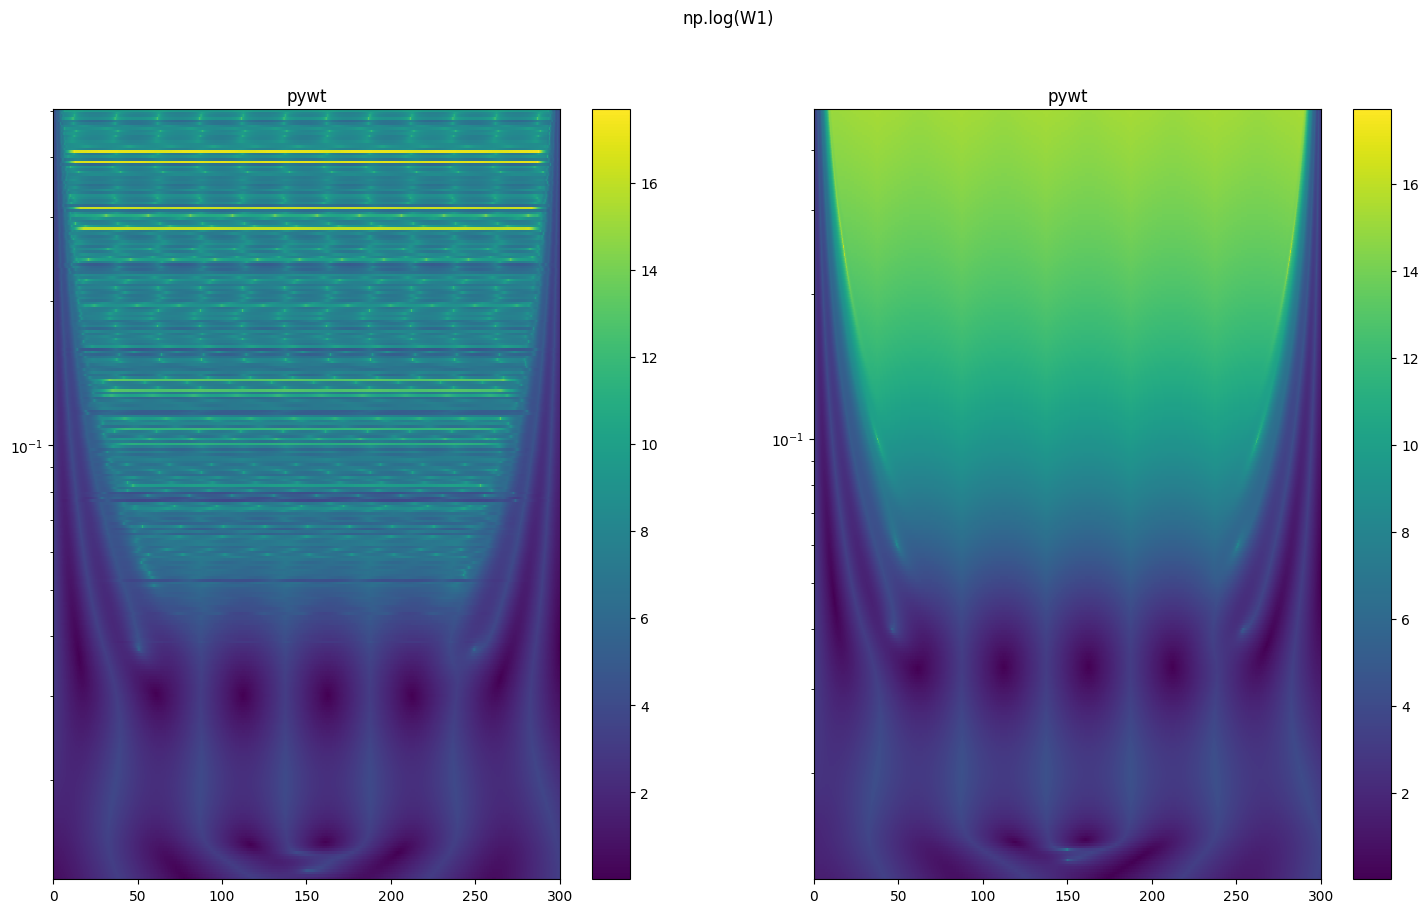

In [40]:
for tracer in tracers:
    tracer['plot_this'] = np.log(tracer['W1']) # this shows lines artifact, very interesting

hypyp.plots.plot_coefs(tracers, 'plot_this', 'np.log(W1)')
plt.show()




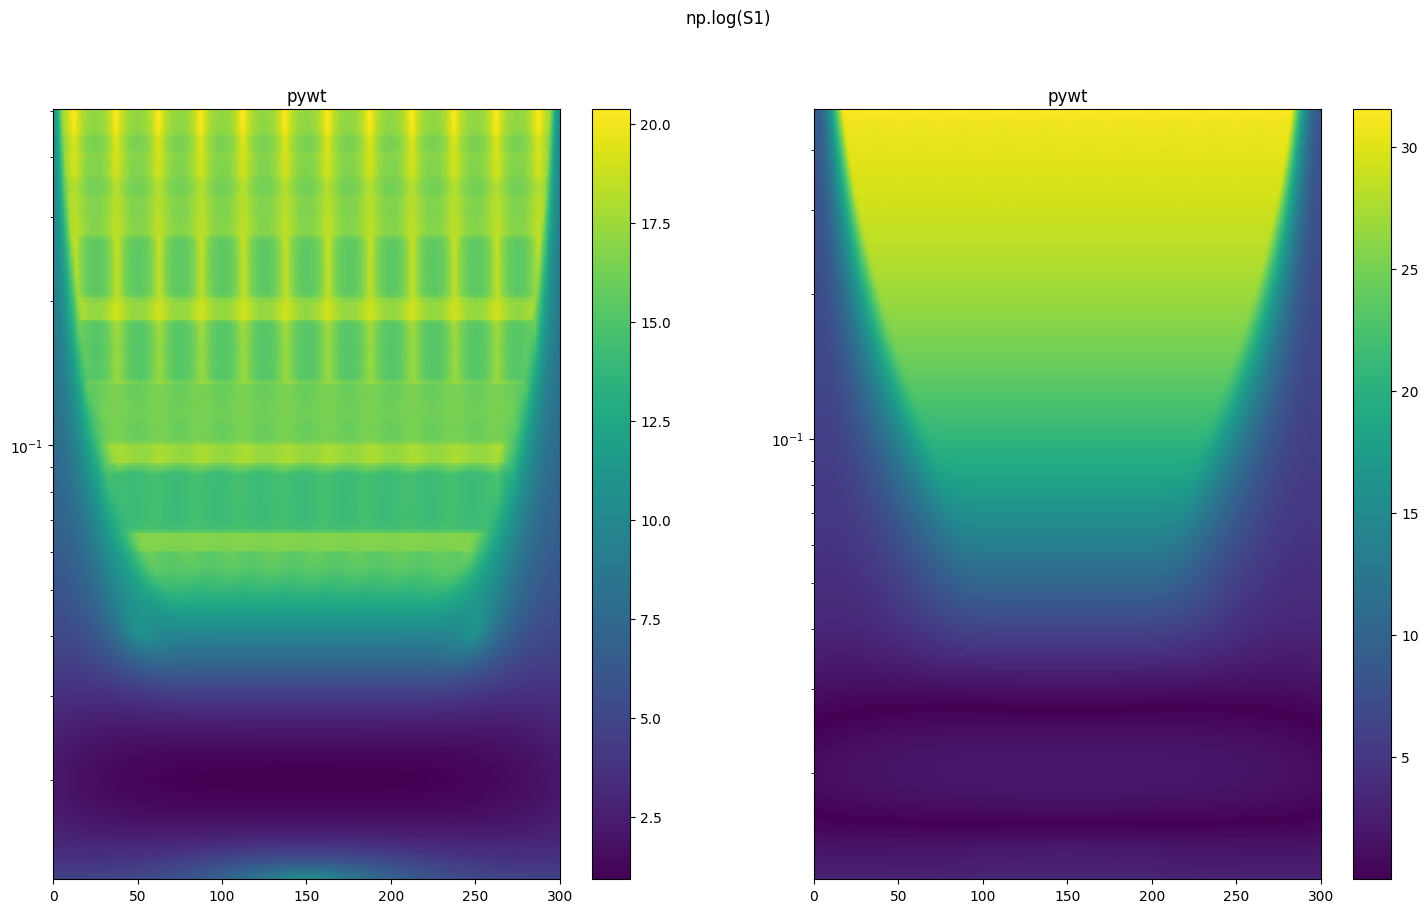

In [37]:
for tracer in tracers:
    tracer['plot_this'] = np.log(tracer['S1']) # this shows a grid artifact, very interesting

hypyp.plots.plot_coefs(tracers, 'plot_this', 'np.log(S1)')
plt.show()



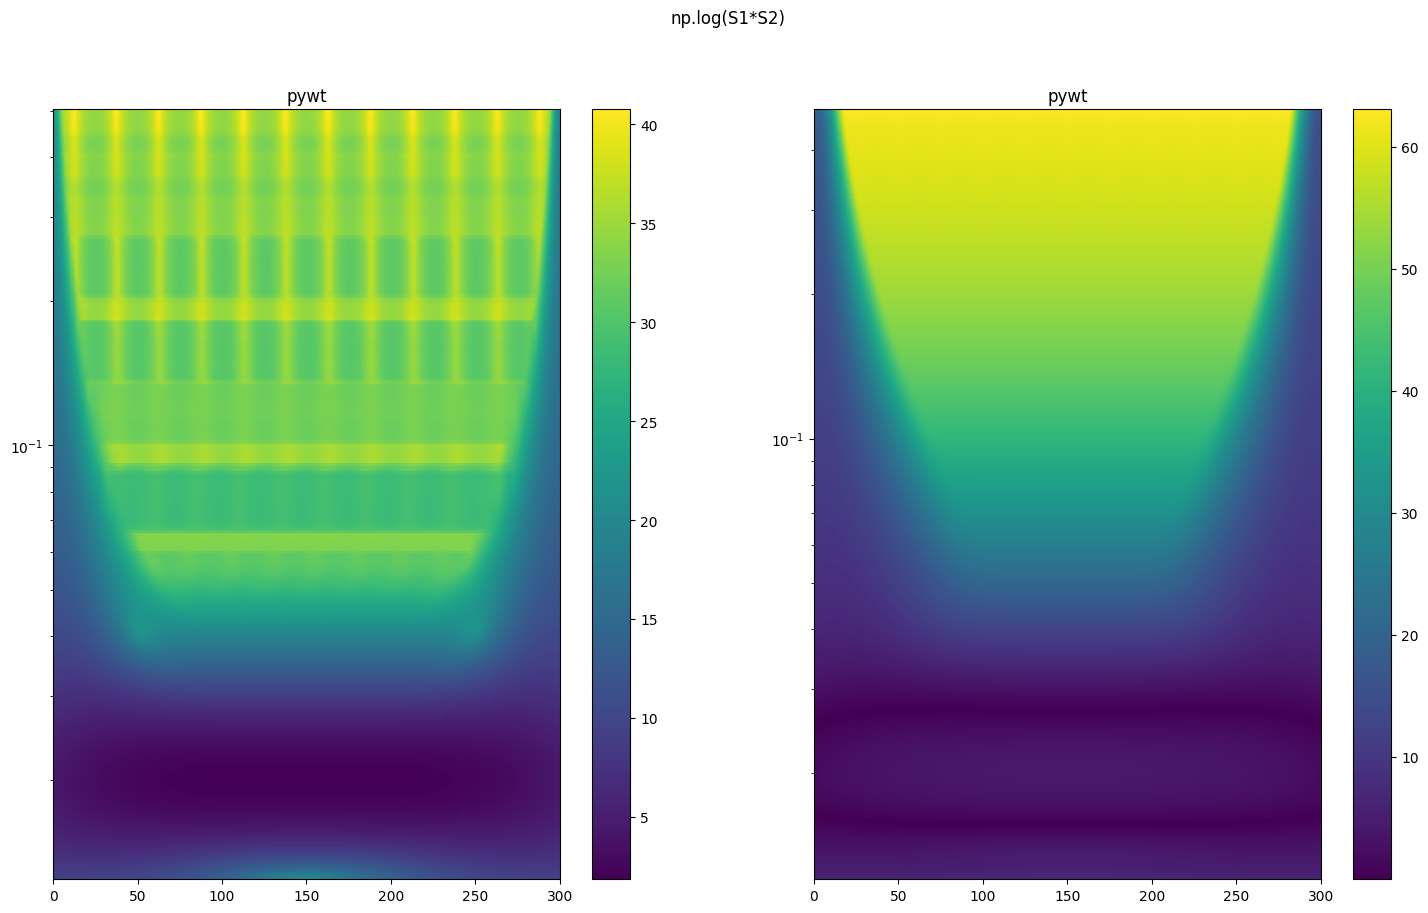

In [38]:
for tracer in tracers:
    tracer['plot_this'] = np.log(tracer['S1'] * tracer['S2']) # this shows a grid artifact, very interesting

hypyp.plots.plot_coefs(tracers, 'plot_this', 'np.log(S1*S2)')
plt.show()


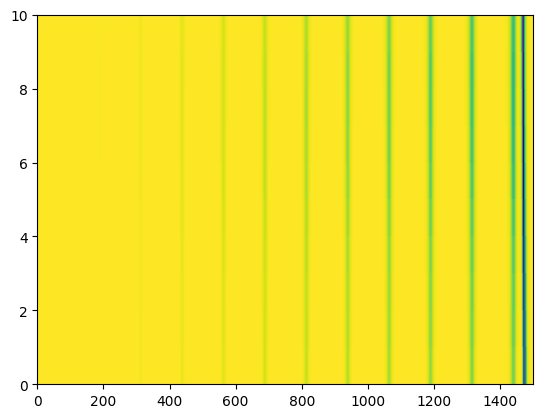

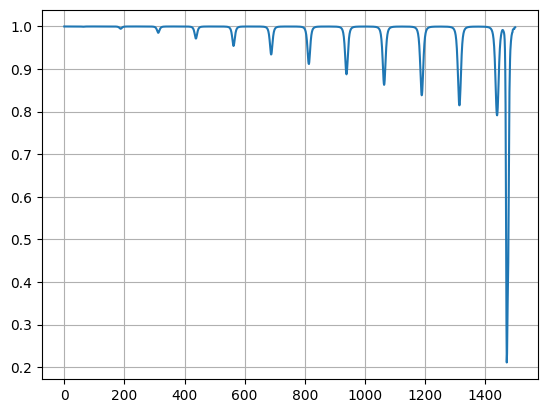

In [19]:
plt.pcolormesh(np.abs(wct_pywt)[:10,:])
plt.show()


plt.plot(np.abs(wct_pywt)[0,:])
plt.grid()
plt.show()

In [25]:
np.argwhere(wct_pywt[0,:] < 0.99)

array([[ 310],
       [ 311],
       [ 312],
       [ 313],
       [ 314],
       [ 315],
       [ 316],
       [ 432],
       [ 433],
       [ 434],
       [ 435],
       [ 436],
       [ 437],
       [ 438],
       [ 439],
       [ 440],
       [ 441],
       [ 442],
       [ 443],
       [ 444],
       [ 555],
       [ 556],
       [ 557],
       [ 558],
       [ 559],
       [ 560],
       [ 561],
       [ 562],
       [ 563],
       [ 564],
       [ 565],
       [ 566],
       [ 567],
       [ 568],
       [ 569],
       [ 570],
       [ 571],
       [ 679],
       [ 680],
       [ 681],
       [ 682],
       [ 683],
       [ 684],
       [ 685],
       [ 686],
       [ 687],
       [ 688],
       [ 689],
       [ 690],
       [ 691],
       [ 692],
       [ 693],
       [ 694],
       [ 695],
       [ 696],
       [ 697],
       [ 698],
       [ 803],
       [ 804],
       [ 805],
       [ 806],
       [ 807],
       [ 808],
       [ 809],
       [ 810],
       [ 811],
       [ 8

In [ ]:
# only lower part
wavelet_name = 'cmor2-1'
tracer_pywt = dict(name='pywt')

wct_pywt, times, freqs_pywt, coif_pywt = xwt_coherence_morl(
    y1,
    y2,
    T,
    1/12,
    wavelet_name=wavelet_name,
    normalize=True,
    smoothing_params=dict(smooth_factor=0),
    tracer=tracer_pywt
)

tracer_pycwt = dict(name='pywt')
wct_pycwt, aWCT_pycwt, coi_pycwt, freqs_pycwt, significance_pycwt = pycwt.wct(y1, y2, dt=1/fs, sig=False, tracer=tracer_pycwt)

tracers = [tracer_pywt, tracer_pycwt]

for tracer in tracers:
    #tracer['plot_this'] = np.abs(tracer['S12']) ** 2
    tracer['plot_this'] = tracer['S1'] * tracer['S2']

hypyp.plots.plot_coefs(tracers, 'plot_this', 'plot_this')
#hypyp.plots.plot_coefs(tracers, 'S12', 'S12')
#hypyp.plots.plot_coefs(tracers, 'W1', 'W1')
#hypyp.plots.plot_coefs(tracers, 'W2', 'W2')
#hypyp.plots.plot_coefs(tracers, 'W12', 'W12')
#hypyp.plots.plot_coefs(tracers, 'S1', 'S1')
#hypyp.plots.plot_coefs(tracers, 'S2', 'S2')
#hypyp.plots.plot_coefs(tracers, 'S12', 'S12')

hypyp.plots.spectrogram_plot_period(np.abs(wct_pywt), times, freqs_pywt, coif_pywt)
hypyp.plots.spectrogram_plot_period(np.abs(wct_pycwt), times, freqs_pycwt, coif_pywt)

#get_frequencies(wavelet_name, freqs_pywt, T)

plt.show()


